In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('economic_index.csv')


In [3]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [6]:
# drop unnecessary columns
df.drop(columns=['Unnamed: 0', 'year', 'month'], axis=1,inplace=True)

In [7]:
df

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256
5,2.50,5.6,1254
6,2.50,5.5,1234
7,2.25,5.5,1195
8,2.25,5.5,1159
9,2.25,5.6,1167


In [9]:
# check null values
df.isnull().sum()


interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

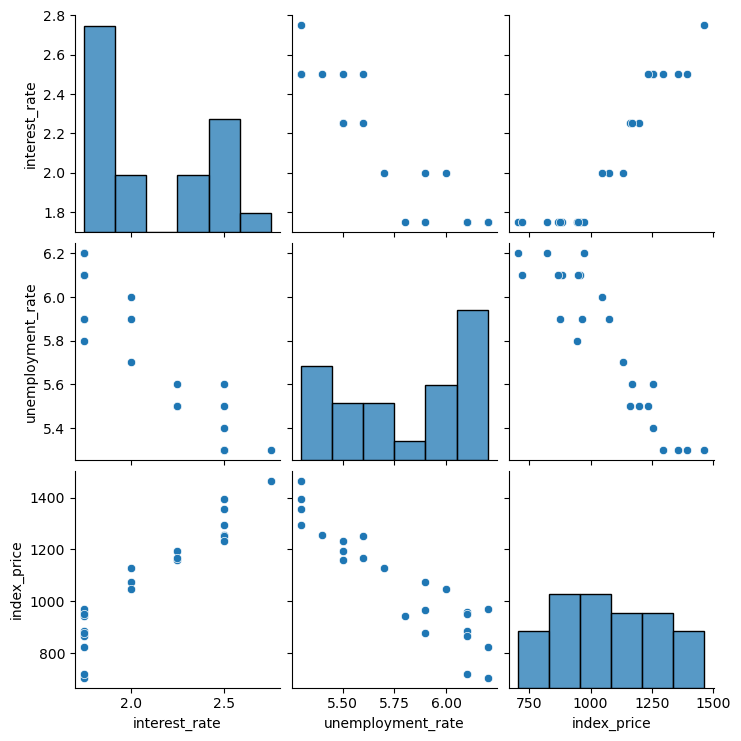

In [11]:
# lets do some visualization
import seaborn as sns
sns.pairplot(df)

In [12]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment rate')

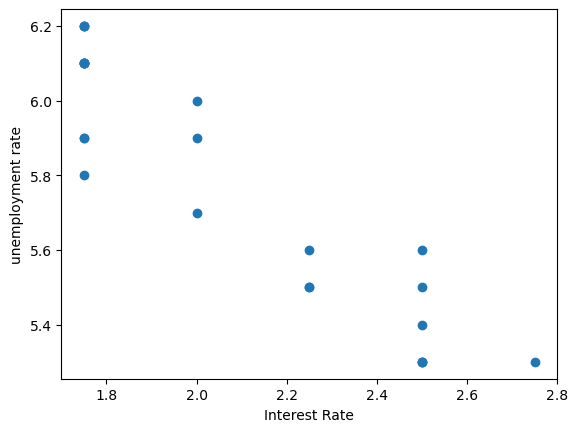

In [14]:
# visualize data points more closely
plt.scatter(df['interest_rate'], df['unemployment_rate'])
plt.xlabel('Interest Rate')
plt.ylabel('unemployment rate')

In [15]:
# independent and dependent features
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [16]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [17]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [24]:
# train test split
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [37]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

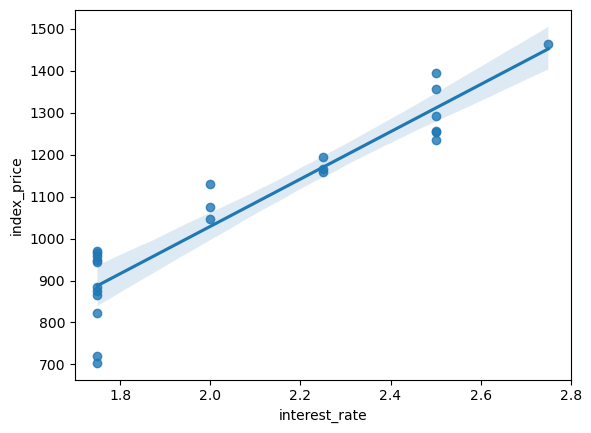

In [38]:
sns.regplot(x=df['interest_rate'],y=df['index_price']) #regression line is given

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

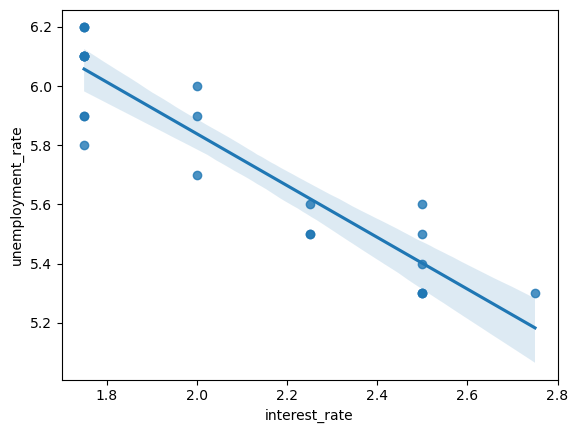

In [39]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate']) #regression line is given

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

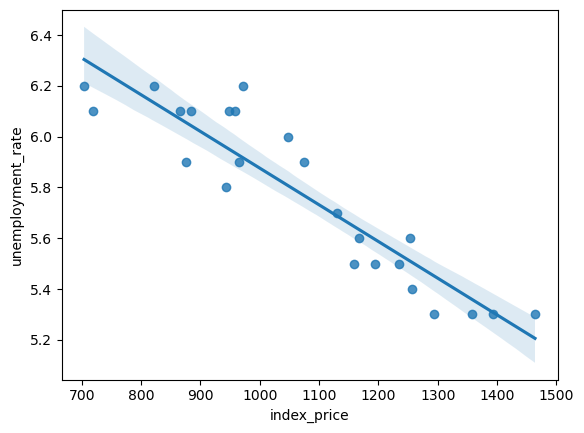

In [40]:
sns.regplot(x=df['index_price'],y=df['unemployment_rate']) #regression line is given

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
scaler = StandardScaler()

In [43]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [44]:
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [46]:
X_test

array([[ 0.36115756, -0.82078268],
       [-1.08347268,  1.33377186],
       [ 1.8057878 , -1.43636969],
       [-1.08347268,  1.02597835],
       [-0.36115756,  0.41039134],
       [ 0.36115756, -0.51298918]])

In [47]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [48]:
regression.fit(X_train, y_train)

LinearRegression()

In [50]:
from sklearn.model_selection import cross_val_score

In [55]:
# Cross Validation
validation_score = cross_val_score(regression, X_train, y_train, scoring='neg_mean_squared_error',cv=3)

In [56]:
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [57]:
np.mean(validation_score)

-5914.828180162388

In [58]:
# Prediction
y_pred = regression.predict(X_test)

In [59]:
y_pred

array([1180.7466813 ,  802.74279699, 1379.83457045,  838.52599602,
        973.85313963, 1144.96348227])

In [61]:
# Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [62]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [63]:
print(mse)
print(mae)
print(rmse)

8108.567426306604
73.80444932337097
90.04758423359621


In [64]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred)
print(score)

0.7591371539010257


In [68]:
#Adjusted r squared
1-(1-score)*(len(y_test)-1)/(len(y_test) - X_test.shape[1]-1)

0.5985619231683761

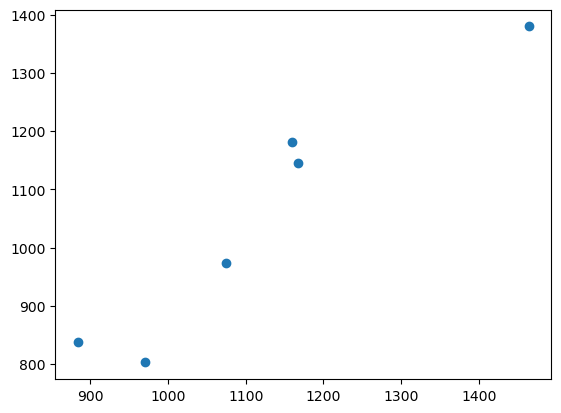

In [69]:
# Assumption
plt.scatter(y_test, y_pred)

In [70]:
residuals = y_test-y_pred

In [71]:
residuals

8     -21.746681
16    168.257203
0      84.165430
18     45.474004
11    101.146860
9      22.036518
Name: index_price, dtype: float64

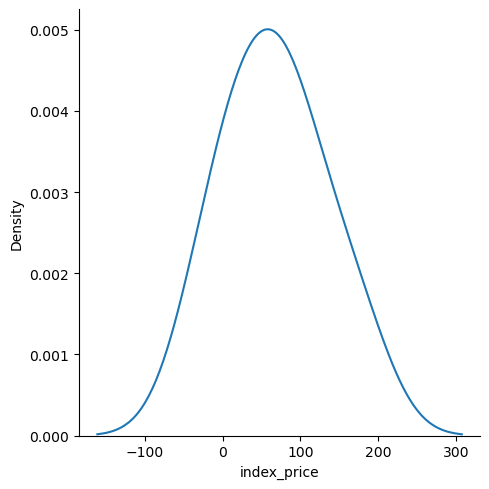

In [73]:
sns.displot(residuals, kind='kde') # Model is goog

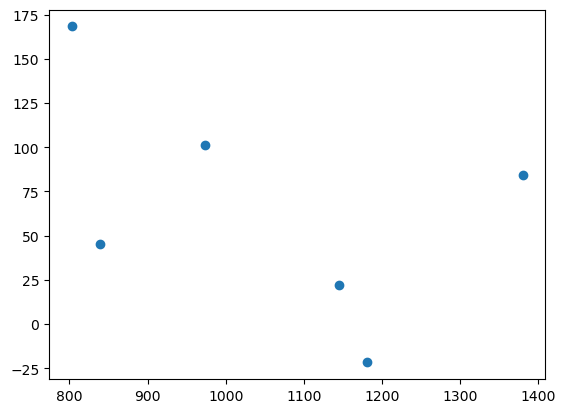

In [75]:
# create a scatter plot 
plt.scatter(y_pred, residuals) #uniformly distributed

In [77]:
# ols linear regression
import statsmodels.api as sm
model=sm.OLS(y_train, X_train).fit()

In [78]:
model.summary()

C:\Users\rpcha\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Sun, 24 Nov 2024   Prob (F-statistic):                       0.754
Time:                        19:12:15   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
print(regression.coef_)

[  88.27275507 -116.25716066]
